In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../Datasets/seismicRecord/earthquake.txt')



In [34]:
df.columns = ['Velocity']
time_units = np.arange(len(df['Velocity']))
minutes = time_units / (20*60)
print(minutes)

df

[0.00000000e+00 8.33333333e-04 1.66666667e-03 ... 2.09966667e+01
 2.09975000e+01 2.09983333e+01]


,Velocity
0,1749.0
1,1694.0
2,1618.0
3,1516.0
4,1394.0
...,...
25194,-12915.0
25195,-13599.0
25196,-14264.0
25197,-14888.0


Text(4, 170000, 'P-S delay interval')

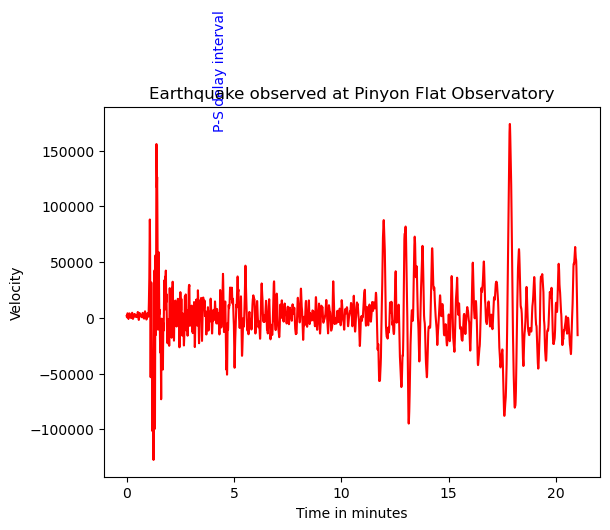

In [35]:
plt.plot(minutes, df['Velocity'], 'r-')
plt.ylabel('Velocity')
plt.xlabel('Time in minutes')
plt.title('Earthquake observed at Pinyon Flat Observatory')
plt.text(4, 170000, 'P-S delay interval', rotation=90, c='b' )

In [36]:
df_delta_time = pd.read_csv('../Datasets/TravelTimeDelta/DeltaTime.txt', \
                            delim_whitespace=True, skiprows=2, header=0)
print(df_delta_time.columns)
print(df_delta_time.head())
df_delta_time.columns = ['Degrees', 'P_wave_minutes', 'P_wave_seconds', 'S-P_minutes', 'S-P_seconds']
print(df_delta_time.columns)

Index(['Deg', 'M', 'S', 'M.1', 'S.1'], dtype='object')
   Deg  M     S  M.1   S.1
0  0.0  0   5.4    0   4.0
1  0.5  0  10.6    0   7.8
2  1.0  0  17.7    0  13.5
3  1.5  0  24.6    0  19.0
4  2.0  0  31.4    0  24.4
Index(['Degrees', 'P_wave_minutes', 'P_wave_seconds', 'S-P_minutes',
       'S-P_seconds'],
      dtype='object')


In [37]:
# Convert delay time to decimal minutes. 
df_delta_time['P_decimal_minutes'] = df_delta_time['P_wave_minutes'] + (df_delta_time['P_wave_seconds']/60)
# Calculate S wave arrival time in minutes
df_delta_time['SP_decimal_minutes'] = df_delta_time['S-P_minutes'] + \
             df_delta_time['S-P_seconds'] / 60.0 # Convert delay time to decimal minutes.
df_delta_time['S_decimal_minutes'] = df_delta_time['P_decimal_minutes'] + \
           df_delta_time['SP_decimal_minutes']

df_delta_time.head()

,Degrees,P_wave_minutes,P_wave_seconds,S-P_minutes,S-P_seconds,P_decimal_minutes,SP_decimal_minutes,S_decimal_minutes
0,0.0,0,5.4,0,4.0,0.090000,0.066667,0.156667
1,0.5,0,10.6,0,7.8,0.176667,0.130000,0.306667
2,1.0,0,17.7,0,13.5,0.295000,0.225000,0.520000
3,1.5,0,24.6,0,19.0,0.410000,0.316667,0.726667
4,2.0,0,31.4,0,24.4,0.523333,0.406667,0.930000


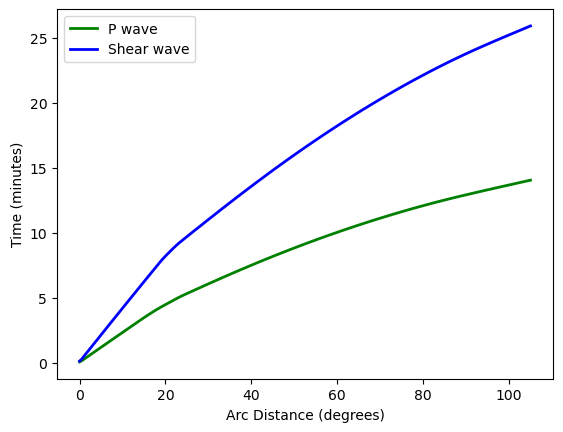

In [39]:
plt.plot(df_delta_time['Degrees'], df_delta_time['P_decimal_minutes'], 'g-', label='P wave', linewidth = 2)
plt.plot(df_delta_time['Degrees'], df_delta_time['S_decimal_minutes'], 'b-', label = 'Shear wave', linewidth = 2)
plt.xlabel('Arc Distance (degrees)')
plt.ylabel('Time (minutes)')
plt.legend(loc=2)
plt.savefig('seismogram.png')

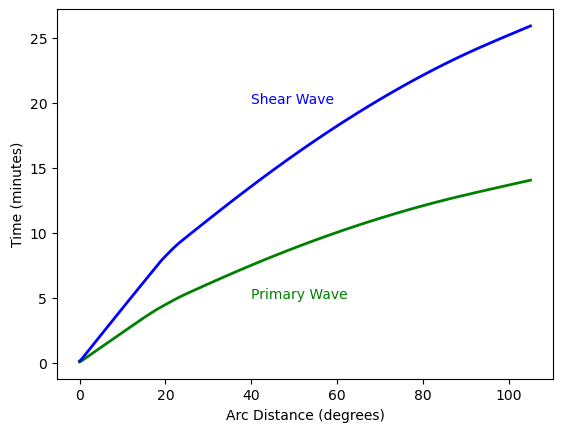

In [47]:
plt.plot(df_delta_time['Degrees'], df_delta_time['P_decimal_minutes'], 'g-', label='P wave', linewidth = 2)
plt.plot(df_delta_time['Degrees'], df_delta_time['S_decimal_minutes'], 'b-', label = 'Shear wave', linewidth = 2)
plt.xlabel('Arc Distance (degrees)')
plt.ylabel('Time (minutes)')
plt.text(40, 5, 'Primary Wave', rotation=0, c='g' )
plt.text(40, 20, 'Shear Wave', rotation=0, c='b' )
plt.savefig('seismogram2.png')